In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("base_enriquecida_codigos")
df.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725


In [4]:
df["VL_FOB/QT_ESTAT"]=df["VL_FOB"]/df["QT_ESTAT"]

In [5]:
df.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,VL_FOB/QT_ESTAT
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,155.905660
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,0.294388
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,22.351557


Serão calculadas as contagens das ocorrências de cada CO_NCM e o desvio padrão da variável alvo (VL_FOB/QT_ESTAT) para cada um dos CO_NCM.

In [6]:
df1 = df.groupby(["CO_NCM","CO_UNID"]).agg({'VL_FOB/QT_ESTAT':['count', 'std', 'mean', 'min', 'max'] }).reset_index()
df1.head(3)

CO_NCM CO_UNID VL_FOB/QT_ESTAT                                       \
                             count            std          mean     min   
0  1012100      11              59  103496.171790  47824.403860  1750.0   
1  1012900      11              26   73597.784790  49878.852564  1750.0   
2  1022110      11               2     547.300649   1283.000000   896.0   

             
        max  
0  670145.0  
1  262008.0  
2    1670.0

In [7]:
df1["CV"]=(df1["VL_FOB/QT_ESTAT"]["std"]/df1["VL_FOB/QT_ESTAT"]["mean"])*100
df1

CO_NCM CO_UNID VL_FOB/QT_ESTAT                                \
                                 count            std           mean   
0      1012100      11              59  103496.171790   47824.403860   
1      1012900      11              26   73597.784790   49878.852564   
2      1022110      11               2     547.300649    1283.000000   
3      1022190      11               6    4314.002578    4246.611111   
4      1031000      11              11    1902.337788    2243.122746   
...        ...     ...             ...            ...            ...   
8408  97020000      11              23   21241.602035   11782.436328   
8409  97030000      11              88  339769.375502  107874.026902   
8410  97040000      10              11       3.138801      80.746323   
8411  97050000      10               2      36.910974      37.900000   
8412  97060000      10               9    1183.156873     841.460155   

                                         CV  
              min           max              
0     1750.000000  6.701450e+05  216.408702  
1     1750.000000  2.620080e+05  147.553083  
2      896.000000  1.670000e+03   42.657884  
3     1000.000000  1.150967e+04  101.586947  
4      876.818182  6.170386e+03   84.807565  
...           ...           ...         ...  
8408    17.000000  7.583333e+04  180.281917  
8409     1.117647  2.488000e+06  314.968659  
8410    76.583851  8.473743e+01    3.887237  
8411    11.800000  6.400000e+01   97.390433  
8412     1.262778  2.880000e+03  140.607593  

[8413 rows x 8 columns]

Por meio dos dados calculados (contagem e desvio padrão da variável alvo, para cada um dos códigos NCM), serão identificados os casos de maior coeficiente de variação (CV) e, na sequência, de menor CV.

In [8]:
df1.reset_index().sort_values(by=["CV"],ascending=False).head(50)

index    CO_NCM CO_UNID VL_FOB/QT_ESTAT                               \
                                       count           std           mean   
6157  6157  84212990      11            3922  4.424063e+05    8670.846633   
7549  7549  85423939      11            3300  8.000390e+02      21.461481   
7382  7382  85332120      11            2302  1.476348e+02       3.995283   
7493  7493  85411022      11            1602  1.348215e+02       4.612248   
8137  8137  90328929      11            3116  1.912997e+04     659.253717   
7343  7343  85291019      11            1903  9.610207e+04    3456.669006   
3229  3229  39072039      10             833  4.662608e+03     170.222835   
7519  7519  85414025      11             812  1.721976e+04     630.500037   
6150  6150  84212100      11            1452  5.863198e+05   22425.973403   
7238  7238  85176299      11            1045  1.314436e+05    5832.749263   
6162  6162  84213990      11            3961  3.061393e+04    1470.083269   
7923  7923  90183999      11             741  1.639676e+03      79.698323   
6023  6023  84137010      11             567  5.178396e+05   25288.648777   
6133  6133  84198999      11             893  1.785818e+06   87654.324568   
7383  7383  85332190      11            1397  8.391140e+02      41.756523   
7879  7879  90158090      11             911  4.898468e+05   24542.889024   
7363  7363  85322111      11             976  5.907711e+01       3.049200   
7044  7044  85045000      11            3532  5.877715e+03     309.718637   
7551  7551  85423999      11            1704  5.549317e+03     300.225598   
3170  3170  39039090      10             361  7.555285e+03     411.206209   
3938  3938  49111010      10             930  2.914494e+03     159.584832   
7507  7507  85413029      11             719  2.566628e+06  141287.158263   
7492  7492  85411021      11            1193  1.391625e+01       0.766261   
8026  8026  90262090      11            3260  1.476318e+04     817.838124   
6016  6016  84133090      11            2171  1.648594e+04     924.499325   
6024  6024  84137080      11             744  2.763628e+05   15658.915688   
8143  8143  90328989      11            1855  3.832200e+04    2234.970027   
6928  6928  84821090      11            4151  6.676006e+03     389.369236   
7863  7863  90138090      11             468  4.304486e+04    2529.186573   
7239  7239  85176900      11             490  8.542304e+04    5081.680966   
6910  6910  84814000      11            3350  1.530516e+04     914.422117   
7229  7229  85176277      11            1344  1.900730e+04    1151.226519   
6785  6785  84717029      11             335  3.577958e+04    2231.148104   
6019  6019  84135090      11            1559  8.975862e+04    5611.497655   
7370  7370  85322410      11            2704  4.875979e+00       0.305747   
7529  7529  85416090      11            1131  3.100392e+02      19.720880   
6034  6034  84143019      11             584  2.490366e+04    1620.685825   
7688  7688  87083011      11             299  3.711237e+04    2461.518919   
7501  7501  85412199      11             617  3.920854e+02      26.026637   
7439  7439  85369030      11             592  1.046402e+03      73.030261   
6892  6892  84798999      11            3091  5.357551e+05   37536.846746   
7503  7503  85412920      11            2073  1.880747e+03     132.122207   
8144  8144  90328990      11            2276  3.823273e+04    2687.975570   
6924  6924  84818099      11            4736  7.579490e+05   53506.835505   
7167  7167  85167990      11             365  1.310461e+04     925.286401   
6951  6951  84833010      11             607  1.193304e+04     848.161256   
7392  7392  85334019      11             477  6.813547e+03     484.528079   
5964  5964  84099116      11            1143  1.064060e+03      75.997973   
7460  7460  85392910      11             982  4.760108e+02      34.276937   
2063  2063  29329999      10             635  2.661192e+04    1922.509222   



Inicialmente, há que se destacar que os maiores CV geralmente ocorrem em códigos NCM "residuais". 
Explico: no âmbito da NCM existem alguns códigos que são utilizados para a classificação fiscal das mercadorias que não se enquadram em nenhum dos possíveis códigos anteriores (no âmbito de uma dada subposição, item, etc.) Em virtude dessa constatação é que se pode entender a enorme variação dos valores por unidade de medida estatística. Acrescente-se ainda que os maiores CV ocorrem em códigos NCM que são bastante recorrentes (vide coluna "count").

Percebe-se por meio do dataframe df1 (ordenação acima) que os maiores valores de coeficiente de variação (CV) estão associados, predominantemente, aos CO_NCM cuja quantidade estatística tem por unidade (CO_UNID) o 11 (unidade). Tal fato justifica os piores desempenhos dos modelos (regressão linear, random forest regressor e grandient boost regressor) quando eram aplicados em bases totais ou predominantemente compostas de códigos NCM cuja unidade de medida estatística é a "unidade".

Por outro lado, conforme o mesmo dataframe df1 (ordenação abaixo), os menores valores de CV estão associados, predominantemente, aos CO_NCM cuja quantidade estatística tem por unidade (CO_UNID) o 10 (quilograma líquido), o que justifica os melhores desempenhos dos modelos quando aplicados em bases totais ou predominantemente compostas de códigos NCM cuja unidade de medida estatística é o "quilograma líquido".

In [9]:
df1.reset_index().sort_values(by=[("CV")],ascending=True).head(50)

index    CO_NCM CO_UNID VL_FOB/QT_ESTAT                             \
                                       count         std           mean   
2758  2758  33012915      10               4    0.000000     185.000000   
2108  2108  29333944      10               2    0.000000     250.000000   
764    764  23099040      10               3    0.000000       2.670000   
808    808  25102090      10               2    0.000000      84.000000   
7824  7824  90065320      11               2    0.000000     273.000000   
2406  2406  30019039      10               2    0.000000     900.000000   
984    984  28062000      10               2    0.000000      58.000000   
123    123   4012010      10               3    0.000000       0.583793   
668    668  20098911      10               2    0.000000       4.000000   
357    357  10082110      10               2    0.000000     104.000000   
231    231   7142000      10               2    0.000000       3.550000   
3599  3599  41152000      10               7    0.000000       0.280008   
8        8   1061300      11               2    0.000000      65.000000   
130    130   4039000      10              10    0.000002       4.670000   
2533  2533  30045050      10               7    0.008133    2343.745238   
1104  1104  28274919      10               2    0.007071      55.164643   
119    119   3077200      10               2    0.005068      16.018083   
12      12   2012020      10               6    0.005151      12.006279   
1177  1177  28351021      10               2    0.002121       3.534250   
935    935  27111210      10               2    0.004624       6.549742   
2384  2384  29419036      10               4    0.398368     392.662348   
4603  4603  61041300      11              12    0.039007      30.960906   
6477  6477  84459020      11               2  366.988419  268545.500000   
2465  2465  30039019      10               2    0.016209      11.304272   
879    879  26139010      10               2    0.022415      14.104280   
1965  1965  29269093      10               3    0.088537      54.307556   
2490  2490  30042041      10               2    0.262517     156.106680   
2454  2454  30032029      10               3    0.337151     181.205167   
1622  1622  29159010      10               2    0.008132       3.791950   
1518  1518  29110010      10               4    0.005809       2.636083   
2425  2425  30022012      10               4    4.681066    1966.192565   
4021  4021  52063500      10               7    0.023652       9.200734   
2383  2383  29419035      10               2    0.320555     111.160000   
2956  2956  38030010      10               3    0.004518       1.410904   
3829  3829  48101381      10               3    0.009811       2.795993   
1343  1343  29037200      10               7    0.020324       5.764583   
2288  2288  29371200      10               9   40.414791   10331.395883   
908    908  27082000      10               2    0.084853      20.860000   
1869  1869  29223120      10               2    2.055254     503.155412   
1509  1509  29096011      10               3    0.017798       4.225000   
497    497  15149910      10               5    0.011539       2.701345   
191    191   7052900      10               2    0.008286       1.926953   
1200  1200  28366090      10               2    0.002678       0.591079   
2067  2067  29331911      10               3    0.167319      36.888183   
3578  3578  41071190      15               5    4.919350     996.800000   
2638  2638  31053010      10               3    0.002146       0.416019   
3300  3300  39119021      10               8    0.034144       6.609290   
2349  2349  29400023      10               2    0.214018      36.464667   
2281  2281  29362939      10               2   25.455844    4232.000000   
1932  1932  29242959      10               3    0.546983      89.678603   

                                          CV  
                min            max            
2758     1

In [10]:
# cálculo de faixas de CV para análise"
import sys

df1['faixa_CV']=pd.cut(

   df1['CV'],

   bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, sys.maxsize],

   labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "+ de 100 %"]

)

In [11]:
df1.head()

CO_NCM CO_UNID VL_FOB/QT_ESTAT                                            \
                             count            std          mean          min   
0  1012100      11              59  103496.171790  47824.403860  1750.000000   
1  1012900      11              26   73597.784790  49878.852564  1750.000000   
2  1022110      11               2     547.300649   1283.000000   896.000000   
3  1022190      11               6    4314.002578   4246.611111  1000.000000   
4  1031000      11              11    1902.337788   2243.122746   876.818182   

                          CV    faixa_CV  
             max                          
0  670145.000000  216.408702  + de 100 %  
1  262008.000000  147.553083  + de 100 %  
2    1670.000000   42.657884       40-50  
3   11509.666667  101.586947  + de 100 %  
4    6170.385965   84.807565       80-90

In [12]:
Faixas_CV_1=df1.groupby("faixa_CV").count()
Faixas_CV_1.head(30)

D:\ANACONDA\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


CO_NCM CO_UNID VL_FOB/QT_ESTAT                            CV
                                    count   std  mean   min   max      
faixa_CV                                                               
0-10          302     302             302   302   302   302   302   302
10-20         246     246             246   246   246   246   246   246
20-30         245     245             245   245   245   245   245   245
30-40         238     238             238   238   238   238   238   238
40-50         205     205             205   205   205   205   205   205
50-60         237     237             237   237   237   237   237   237
60-70         248     248             248   248   248   248   248   248
70-80         228     228             228   228   228   228   228   228
80-90         233     233             233   233   233   233   233   233
90-100        248     248             248   248   248   248   248   248
+ de 100 %   5615    5615            5615  5615  5615  5615  5615  5615

Vislumbrando a possibilidade de melhorar os modelos, faremos nova análise considerando a variável alvo não mais como a razão "VL_FOB"/"QT_EST", mas sim como a razão "VL_FOB"/"KG_LIQUIDO", independentemente de qual a unidade de medida estatística (CO_UNID) para o subitem da NCM (CO_NCM).

In [13]:
df["VL_FOB/KG_LIQUIDO"]=df["VL_FOB"]/df["KG_LIQUIDO"]

In [14]:
df.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,VL_FOB/QT_ESTAT,VL_FOB/KG_LIQUIDO
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,155.905660,187.795455
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,0.294388,4.310302
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,22.351557,22.351557


In [15]:
df2 = df.groupby(["CO_NCM","CO_UNID"]).agg({'VL_FOB/KG_LIQUIDO':['count', 'std', 'mean', 'min', 'max'] })
df2.head(3)

VL_FOB/KG_LIQUIDO                                            
                            count         std        mean       min       max
CO_NCM  CO_UNID                                                              
1012100 11                     59  206.339297   99.502484  3.684211  1340.290
1012900 11                     26  147.039269  100.037308  4.069767   524.016
1022110 11                      2    1.002732    3.465962  2.756923     4.175

In [16]:
df2["CV"]=(df2["VL_FOB/KG_LIQUIDO"]["std"]/df2["VL_FOB/KG_LIQUIDO"]["mean"])*100
df2.head(3)

VL_FOB/KG_LIQUIDO                                              \
                            count         std        mean       min       max   
CO_NCM  CO_UNID                                                                 
1012100 11                     59  206.339297   99.502484  3.684211  1340.290   
1012900 11                     26  147.039269  100.037308  4.069767   524.016   
1022110 11                      2    1.002732    3.465962  2.756923     4.175   

                         CV  
                             
CO_NCM  CO_UNID              
1012100 11       207.371000  
1012900 11       146.984433  
1022110 11        28.930841

In [17]:
# maiores valores de desvio padrão para a variável alvo "VL_FOB/KG_LIQUIDO":
df2.reset_index().sort_values(by=[("CV")],ascending=False).head(50)

CO_NCM CO_UNID VL_FOB/KG_LIQUIDO                             \
                                   count           std         mean   
3229  39072039      10               833   4662.608173   170.222835   
3170  39039090      10               361   7555.285055   411.206209   
3938  49111010      10               930   2914.493868   159.584832   
7524  85414032      11               376    566.908762    39.633797   
2063  29329999      10               635  26611.916375  1922.509222   
6065  84149039      10              1952   3944.476264   294.459988   
3342  39162000      10               474    401.257425    33.353478   
3454  40012200      10               326    138.999437    11.657964   
3896  48192000      10              1292    186.601872    15.672878   
5414  72299000      10               351    388.276714    33.764558   
767   23099090      10               669    239.676620    21.096070   
454   13023990      10               163   7151.564892   632.075956   
926   27101931      10               498    380.408019    35.287791   
3463  40021919      10               540     42.739761     3.971653   
5556  73239900      10               615    205.838322    19.399257   
5662  76012000      10               217    269.330395    26.079562   
5279  72104910      10               283     24.319311     2.385135   
3364  39181000      10               690    418.378868    41.784930   
5370  72202090      10               363    205.856486    20.694253   
5146  70191100      10               108    300.293408    30.189683   
8170  91052100      11               289    198.739589    20.210318   
3286  39100012      10               313    669.526671    69.192702   
5382  72249000      10               183    858.627474    91.318095   
2783  33049990      10              1137   2489.028618   264.845433   
3895  48191000      10              1035    118.698881    12.953328   
5691  76071990      10               680    685.095609    75.788256   
5802  82029990      10               361    783.651921    87.124690   
5460  73064000      10               407    391.650617    44.005883   
424   12119090      10               412    469.603685    52.865073   
7790  90011011      10               200   2825.655578   318.644303   
2504  30042099      10               169  34580.193195  3904.824364   
5813  82052000      10               472    331.575632    37.625103   
6137  84199039      10               452   3049.278233   347.631823   
564   17029000      10               243    299.322557    34.191452   
5340  72171019      10               155    329.453704    37.659680   
1048  28230010      10               160    142.580547    16.398334   
3159  39022000      10               147    340.058141    39.160563   
3081  38237090      10               158   4182.517439   489.640542   
2618  31023000      10                83     27.746709     3.261380   
3018  38099290      10               103    344.467839    40.767975   
1894  29231000      10               158    611.168132    72.343609   
3770  48025610      10               164     71.920080     8.584618   
3427  39232990      10               915    436.285885    52.336366   
5265  72091600      10                85    221.908916    26.737984   
2631  31043010      10               110     46.028944     5.546564   
5883  83024900      10              1410   2464.693240   303.078227   
3870  48115923      10                92    189.055980    23.407448   
2242  29359029      10                69   9705.589207  1202.064865   
5840  82084000      10               650    247.988158    30.783105   
2613  31010000      10               158    842.364419   104.676581   

                                         CV  
            min            max               
3229   0.250000  134575.000000  2739.120274  
3170   0.613772  143560.000000  1837.347025  
3938   0.025157   88495.000000  1826.297550  
7524   1.410385   10947.000000  1430.367014  
2063   0.960000  658990.166667  1384.22

In [47]:
# menores valores de desvio padrão para a variável alvo "VL_FOB/KG_LIQUIDO":
df2.reset_index().sort_values(by=[("CV")],ascending=True).head(50)

CO_NCM CO_UNID VL_FOB/KG_LIQUIDO                           \
                                   count        std          mean   
2758  33012915      10                 4   0.000000    185.000000   
2108  29333944      10                 2   0.000000    250.000000   
808   25102090      10                 2   0.000000     84.000000   
764   23099040      10                 3   0.000000      2.670000   
123    4012010      10                 3   0.000000      0.583793   
357   10082110      10                 2   0.000000    104.000000   
3599  41152000      10                 7   0.000000      0.280008   
2406  30019039      10                 2   0.000000    900.000000   
984   28062000      10                 2   0.000000     58.000000   
7824  90065320      11                 2   0.000000   1365.000000   
231    7142000      10                 2   0.000000      3.550000   
668   20098911      10                 2   0.000000      4.000000   
130    4039000      10                10   0.000002      4.670000   
2533  30045050      10                 7   0.008133   2343.745238   
1104  28274919      10                 2   0.007071     55.164643   
119    3077200      10                 2   0.005068     16.018083   
12     2012020      10                 6   0.005151     12.006279   
1177  28351021      10                 2   0.002121      3.534250   
935   27111210      10                 2   0.004624      6.549742   
2384  29419036      10                 4   0.398368    392.662348   
2465  30039019      10                 2   0.016209     11.304272   
879   26139010      10                 2   0.022415     14.104280   
1965  29269093      10                 3   0.088537     54.307556   
2490  30042041      10                 2   0.262517    156.106680   
2454  30032029      10                 3   0.337151    181.205167   
1622  29159010      10                 2   0.008132      3.791950   
1518  29110010      10                 4   0.005809      2.636083   
2425  30022012      10                 4   4.681066   1966.192565   
4021  52063500      10                 7   0.023652      9.200734   
2383  29419035      10                 2   0.320555    111.160000   
2956  38030010      10                 3   0.004518      1.410904   
3829  48101381      10                 3   0.009811      2.795993   
1343  29037200      10                 7   0.020324      5.764583   
6544  84502010      11                 2   0.081808     21.711673   
2288  29371200      10                 9  40.414791  10331.395883   
908   27082000      10                 2   0.084853     20.860000   
1869  29223120      10                 2   2.055254    503.155412   
1509  29096011      10                 3   0.017798      4.225000   
497   15149910      10                 5   0.011539      2.701345   
191    7052900      10                 2   0.008286      1.926953   
1200  28366090      10                 2   0.002678      0.591079   
2067  29331911      10                 3   0.167319     36.888183   
2638  31053010      10                 3   0.002146      0.416019   
3300  39119021      10                 8   0.034144      6.609290   
2349  29400023      10                 2   0.214018     36.464667   
2281  29362939      10                 2  25.455844   4232.000000   
5727  79011199      21                 2   0.035125      5.762837   
1932  29242959      10                 3   0.546983     89.678603   
765   23099050      10                 2   0.543412     88.978250   
745   23011010      10                 3   0.018584      3.015587   

                                        CV  
               min           max            
2758    185.000000    185.000000  0.000000  
2108    250.000000    250.000000  0.000000  
808      84.000000     84.000000  0.000000  
764       2.670000      2.670000  0.000000  
123       0.583793      0.583793  0.000000  
357     104.000000    104.000000  0.000000  
3599      0.280008      0.280008  0.000000  
2406    900.00

Constata-se que, alterando a variável alvo de VL_FOB/QT_ESTAT por VL_FOB/KG_LIQUIDO, os maiores valores de coeficiente de variação deixam de se concentrar nos CO_NCM em que a unidade de medida estatística (CO_UNID) é 11 ("unidade"). Portanto, os modelos serão novamente executados, porém, com a alteração da variável alvo, na expectativa de que isso melhore o desempenho dos mesmos.

Por fim, buscar-se-á calcular o coeficente de variação do VL_FOB/KG_LIQUIDO para os possíveis códigos NCM do dataset. Pretende-se verificar um provável motivo para o baixo poder de predição dos modelos de regressão linear implementados.

In [18]:
# cálculo de faixas de CV para análise"
import sys

df2['faixa_CV']=pd.cut(

   df2['CV'],

   bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, sys.maxsize],

   labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "+ de 100 %"]

)

In [19]:
df2.head()

VL_FOB/KG_LIQUIDO                                    \
                            count         std        mean       min   
CO_NCM  CO_UNID                                                       
1012100 11                     59  206.339297   99.502484  3.684211   
1012900 11                     26  147.039269  100.037308  4.069767   
1022110 11                      2    1.002732    3.465962  2.756923   
1022190 11                      6   19.195255   12.279047  1.250000   
1031000 11                     11   62.922765   48.014933  8.167925   

                                      CV    faixa_CV  
                         max                          
CO_NCM  CO_UNID                                       
1012100 11       1340.290000  207.371000  + de 100 %  
1012900 11        524.016000  146.984433  + de 100 %  
1022110 11          4.175000   28.930841       20-30  
1022190 11         51.154074  156.325288  + de 100 %  
1031000 11        156.070000  131.048325  + de 100 %

In [20]:
Faixas_CV_2=df2.groupby("faixa_CV").count()
Faixas_CV_2.head(30)

VL_FOB/KG_LIQUIDO                            CV
                       count   std  mean   min   max      
faixa_CV                                                  
0-10                     304   304   304   304   304   304
10-20                    245   245   245   245   245   245
20-30                    247   247   247   247   247   247
30-40                    245   245   245   245   245   245
40-50                    223   223   223   223   223   223
50-60                    236   236   236   236   236   236
60-70                    243   243   243   243   243   243
70-80                    233   233   233   233   233   233
80-90                    207   207   207   207   207   207
90-100                   218   218   218   218   218   218
+ de 100 %              4076  4076  4076  4076  4076  4076

In [99]:
# análise da variação do VL_FOB no âmbito de um dado CO_NCM. Tomemos o exemplo do 85414032
df[df["CO_NCM"]==48191000]["VL_FOB/KG_LIQUIDO"]

123         9.727273
608         1.176026
2831       37.000000
2940        1.748994
3855        4.721519
             ...    
1757003     1.189450
1760599    23.000000
1761067     2.258065
1762957    10.400000
1763789     2.265096
Name: VL_FOB/KG_LIQUIDO, Length: 1035, dtype: float64

In [100]:
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(df[df["CO_NCM"]==48191000]["VL_FOB/KG_LIQUIDO"], 25), percentile(df[df["CO_NCM"]==48191000]["VL_FOB/KG_LIQUIDO"], 75)
iqr = q75 - q25

In [101]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [102]:
# identify outliers
outliers = [x for x in df[df["CO_NCM"]==48191000]["VL_FOB/KG_LIQUIDO"] if x < lower or x > upper]

In [103]:
len(outliers)

118

In [104]:
# remove outliers
outliers_removed = [x for x in df[df["CO_NCM"]==48191000]["VL_FOB/KG_LIQUIDO"] if x > lower and x < upper]

In [106]:
outliers_removed

[9.727272727272727,
 1.1760261033831358,
 1.7489943316876944,
 4.7215189873417724,
 1.1849624060150377,
 11.261538461538462,
 1.723908918406072,
 1.3622881355932204,
 1.8210890233362143,
 2.162857142857143,
 0.25,
 1.8376436781609196,
 0.5808450704225352,
 1.4290030211480362,
 10.245810055865922,
 2.8,
 4.5,
 2.677985948477752,
 3.482456140350877,
 3.374233128834356,
 1.6288629843483313,
 3.18,
 1.557652786999273,
 1.4881780250347705,
 4.3584905660377355,
 1.7379767827529022,
 1.4784899034240562,
 5.045454545454546,
 1.875,
 5.733333333333333,
 11.626666666666667,
 2.2,
 1.6405681818181819,
 2.6690391459074734,
 0.848296250194492,
 1.061004498150169,
 0.8333333333333334,
 5.0,
 6.9375,
 1.9618293442477088,
 1.6212209778110314,
 4.0,
 2.17349857006673,
 0.5261648122392212,
 0.1024390243902439,
 0.2857142857142857,
 2.5555555555555554,
 2.2566137566137567,
 2.2,
 1.0911737536041206,
 4.733333333333333,
 1.051589990821202,
 1.7797619047619047,
 0.6,
 0.13411764705882354,
 0.86956521739130

<AxesSubplot:ylabel='Count'>

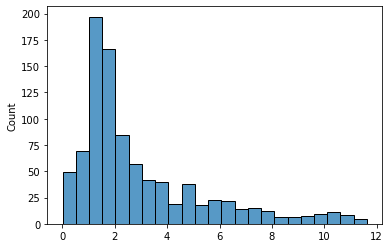

In [108]:
import seaborn as sns
sns.histplot(outliers_removed)